<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras Regression Code Along Project 

Let's now apply our knowledge to a more realistic data set. Here we will also focus on feature engineering and cleaning our data!

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/kc_house_data.csv')

# Exploratory Data Analysis

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


/Users/parthamehta/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

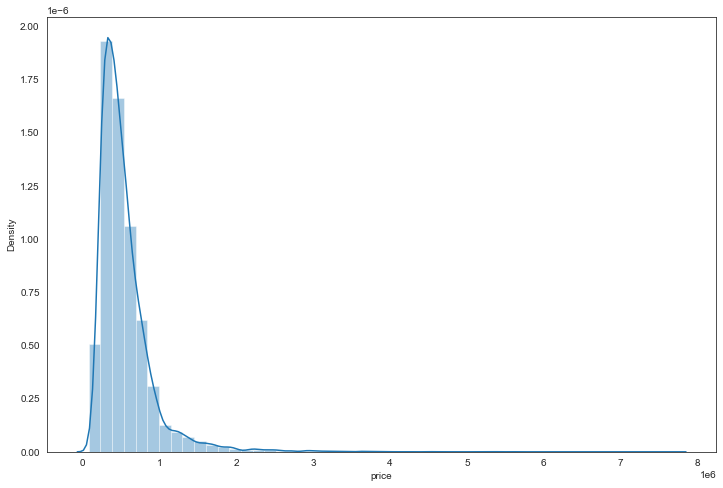

In [5]:
plt.figure(figsize=(12,8))
sns.set_style('white')
sns.distplot(df['price'])

/Users/parthamehta/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

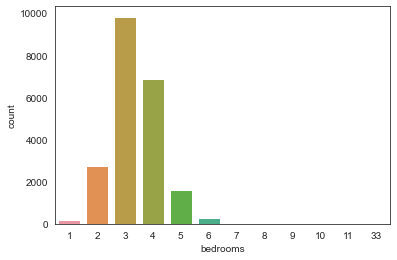

In [6]:
sns.countplot(df['bedrooms'])

In [7]:
df[df['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [8]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

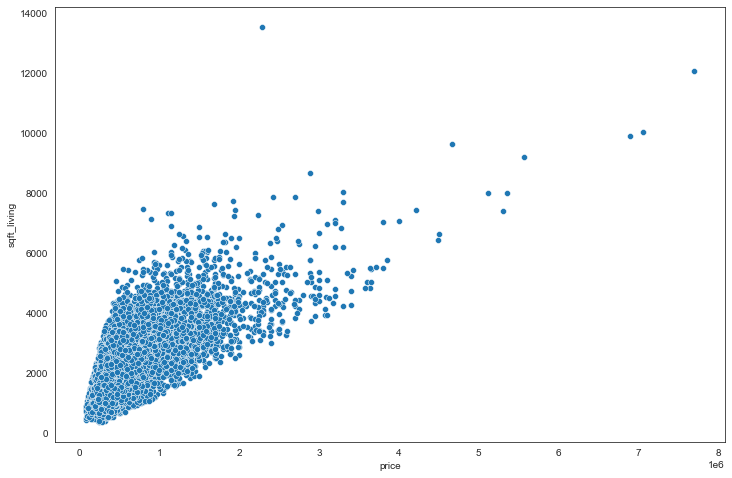

In [9]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

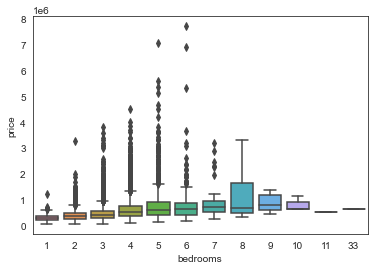

In [10]:
sns.boxplot(x='bedrooms',y='price',data=df)

### Geographical Properties

<AxesSubplot:xlabel='price', ylabel='long'>

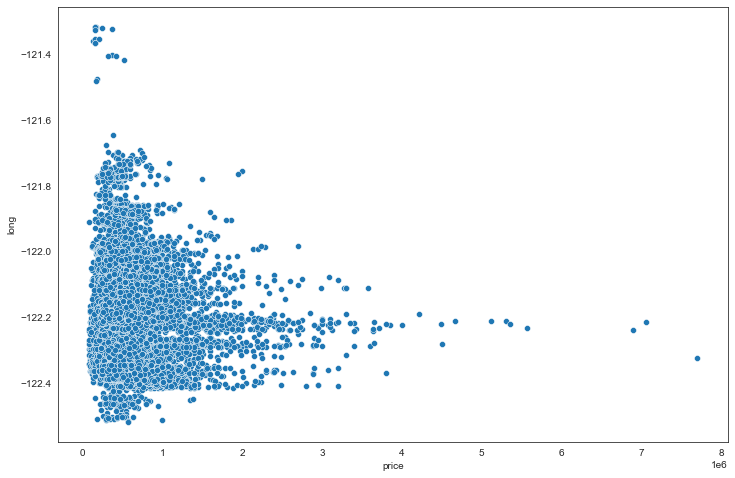

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

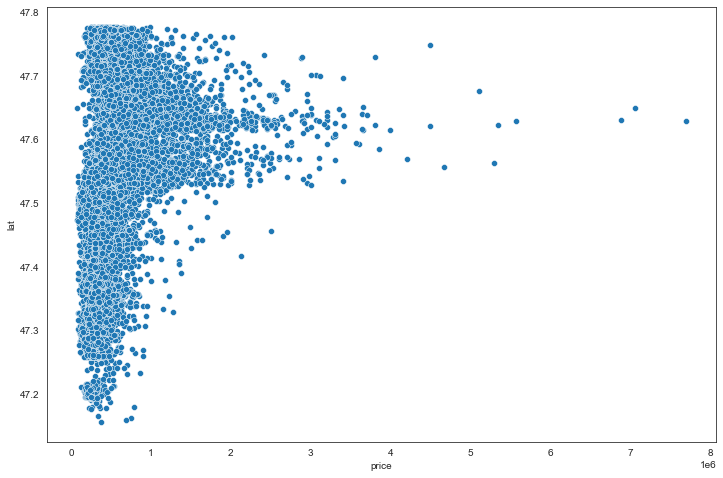

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

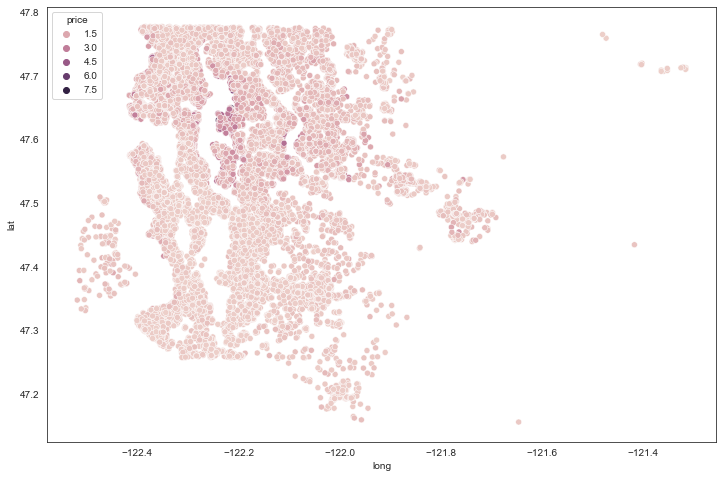

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [14]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [15]:
len(df)*(0.01)

215.97

In [16]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

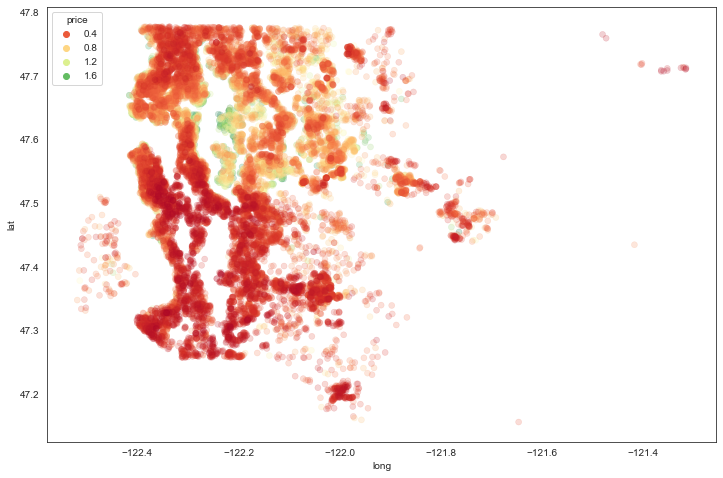

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

### Other Features

<AxesSubplot:xlabel='waterfront', ylabel='price'>

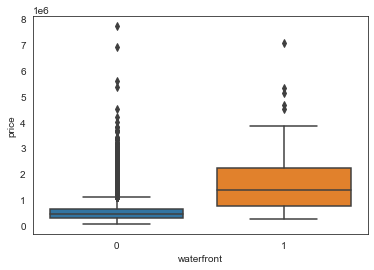

In [18]:
sns.boxplot(x='waterfront',y='price',data=df)

## Working with Feature Data

In [19]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [21]:
df = df.drop('id',axis=1)

In [22]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Feature Engineering from Date

In [23]:
df['date'] = pd.to_datetime(df['date'])

In [24]:
df['month'] = df['date'].apply(lambda date:date.month)

In [25]:
df['year'] = df['date'].apply(lambda date:date.year)

<AxesSubplot:xlabel='year', ylabel='price'>

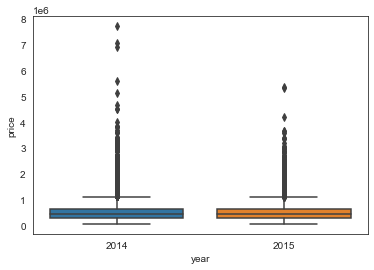

In [26]:
sns.boxplot(x='year',y='price',data=df)

<AxesSubplot:xlabel='month', ylabel='price'>

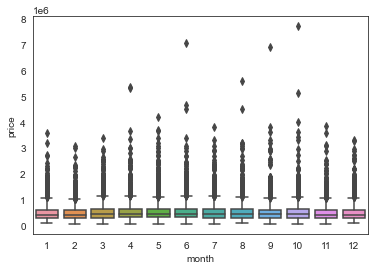

In [27]:
sns.boxplot(x='month',y='price',data=df)

<AxesSubplot:xlabel='month'>

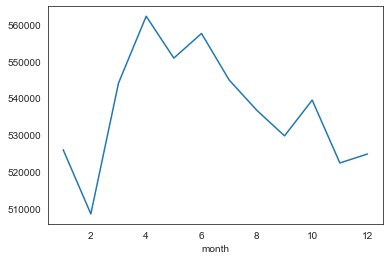

In [28]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

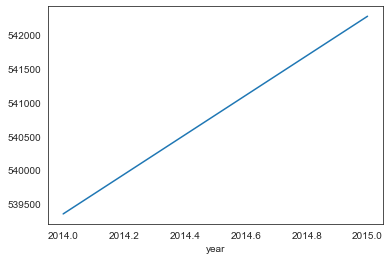

In [29]:
df.groupby('year').mean()['price'].plot()

In [30]:
df = df.drop('date',axis=1)

In [31]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [32]:
# https://i.pinimg.com/originals/4a/ab/31/4aab31ce95d5b8474fd2cc063f334178.jpg
# May be worth considering to remove this or feature engineer categories from it
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [33]:
df = df.drop('zipcode',axis=1)

In [34]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [35]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [36]:
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

In [37]:
X = df.drop('price',axis=1)
y = df['price']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

### Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [42]:
X_train= scaler.fit_transform(X_train)

In [43]:
X_test = scaler.transform(X_test)

In [44]:
X_train.shape

(16197, 19)

In [45]:
X_test.shape

(5400, 19)

## Creating a Model

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [47]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

2021-12-27 11:22:37.781599: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-27 11:22:37.781755: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Training the Model

In [48]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

2021-12-27 11:22:40.381240: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/400
127/127 [==============================] - 1s 5ms/step - loss: 434998590464.0000 - val_loss: 411084881920.0000
Epoch 2/400
127/127 [==============================] - 0s 869us/step - loss: 429505312512.0000 - val_loss: 403376406528.0000
Epoch 3/400
127/127 [==============================] - 0s 877us/step - loss: 413179703296.0000 - val_loss: 336998465536.0000
Epoch 4/400
127/127 [==============================] - 0s 876us/step - loss: 303946893056.0000 - val_loss: 164007952384.0000
Epoch 5/400
127/127 [==============================] - 0s 874us/step - loss: 159939284032.0000 - val_loss: 90914480128.0000
Epoch 6/400
127/127 [==============================] - 0s 867us/step - loss: 106401910848.0000 - val_loss: 88771649536.0000
Epoch 7/400
127/127 [==============================] - 0s 865us/step - loss: 93972684672.0000 - val_loss: 86678421504.0000
Epoch 8/400
127/127 [==============================] - 0s 864us/step - loss: 93298596192.0000 - val_loss: 84494434304.0000
Epoch 9/

127/127 [==============================] - 0s 872us/step - loss: 34457138848.0000 - val_loss: 33966878720.0000
Epoch 68/400
127/127 [==============================] - 0s 861us/step - loss: 35412058512.0000 - val_loss: 33793441792.0000
Epoch 69/400
127/127 [==============================] - 0s 858us/step - loss: 34897314224.0000 - val_loss: 33719013376.0000
Epoch 70/400
127/127 [==============================] - 0s 916us/step - loss: 36268965616.0000 - val_loss: 33718364160.0000
Epoch 71/400
127/127 [==============================] - 0s 866us/step - loss: 36267160688.0000 - val_loss: 33418500096.0000
Epoch 72/400
127/127 [==============================] - 0s 869us/step - loss: 35925746576.0000 - val_loss: 33401843712.0000
Epoch 73/400
127/127 [==============================] - 0s 870us/step - loss: 36636732720.0000 - val_loss: 33147895808.0000
Epoch 74/400
127/127 [==============================] - 0s 879us/step - loss: 37582702448.0000 - val_loss: 33196732416.0000
Epoch 75/400
127/127 

Epoch 133/400
127/127 [==============================] - 0s 903us/step - loss: 31823903208.0000 - val_loss: 30276913152.0000
Epoch 134/400
127/127 [==============================] - 0s 877us/step - loss: 34470817952.0000 - val_loss: 30188316672.0000
Epoch 135/400
127/127 [==============================] - 0s 908us/step - loss: 32384480272.0000 - val_loss: 30179657728.0000
Epoch 136/400
127/127 [==============================] - 0s 902us/step - loss: 32706641168.0000 - val_loss: 30198398976.0000
Epoch 137/400
127/127 [==============================] - 0s 908us/step - loss: 30936941856.0000 - val_loss: 30153297920.0000
Epoch 138/400
127/127 [==============================] - 0s 895us/step - loss: 31641083600.0000 - val_loss: 30210074624.0000
Epoch 139/400
127/127 [==============================] - 0s 891us/step - loss: 31936514672.0000 - val_loss: 30088628224.0000
Epoch 140/400
127/127 [==============================] - 0s 882us/step - loss: 33142124480.0000 - val_loss: 30059225088.0000


127/127 [==============================] - 0s 874us/step - loss: 31526989600.0000 - val_loss: 28727533568.0000
Epoch 199/400
127/127 [==============================] - 0s 855us/step - loss: 32762406608.0000 - val_loss: 28670181376.0000
Epoch 200/400
127/127 [==============================] - 0s 902us/step - loss: 31385202336.0000 - val_loss: 28665802752.0000
Epoch 201/400
127/127 [==============================] - 0s 884us/step - loss: 32495249248.0000 - val_loss: 28668241920.0000
Epoch 202/400
127/127 [==============================] - 0s 885us/step - loss: 32535890016.0000 - val_loss: 28791506944.0000
Epoch 203/400
127/127 [==============================] - 0s 914us/step - loss: 29643197680.0000 - val_loss: 28710756352.0000
Epoch 204/400
127/127 [==============================] - 0s 871us/step - loss: 32126692400.0000 - val_loss: 28658339840.0000
Epoch 205/400
127/127 [==============================] - 0s 909us/step - loss: 31409359744.0000 - val_loss: 28881657856.0000
Epoch 206/400


127/127 [==============================] - 0s 850us/step - loss: 30155530640.0000 - val_loss: 27679598592.0000
Epoch 264/400
127/127 [==============================] - 0s 868us/step - loss: 28898512912.0000 - val_loss: 27717894144.0000
Epoch 265/400
127/127 [==============================] - 0s 854us/step - loss: 30729091040.0000 - val_loss: 27687737344.0000
Epoch 266/400
127/127 [==============================] - 0s 879us/step - loss: 30812861280.0000 - val_loss: 27659132928.0000
Epoch 267/400
127/127 [==============================] - 0s 859us/step - loss: 30610090640.0000 - val_loss: 27739883520.0000
Epoch 268/400
127/127 [==============================] - 0s 860us/step - loss: 30495172288.0000 - val_loss: 27678117888.0000
Epoch 269/400
127/127 [==============================] - 0s 869us/step - loss: 31521932112.0000 - val_loss: 27589218304.0000
Epoch 270/400
127/127 [==============================] - 0s 883us/step - loss: 30713891488.0000 - val_loss: 27623997440.0000
Epoch 271/400


127/127 [==============================] - 0s 889us/step - loss: 29183006128.0000 - val_loss: 26975354880.0000
Epoch 329/400
127/127 [==============================] - 0s 890us/step - loss: 30898601536.0000 - val_loss: 26797737984.0000
Epoch 330/400
127/127 [==============================] - 0s 890us/step - loss: 29966828736.0000 - val_loss: 26816385024.0000
Epoch 331/400
127/127 [==============================] - 0s 876us/step - loss: 29416360272.0000 - val_loss: 26837823488.0000
Epoch 332/400
127/127 [==============================] - 0s 881us/step - loss: 30617076752.0000 - val_loss: 26767407104.0000
Epoch 333/400
127/127 [==============================] - 0s 904us/step - loss: 28556936720.0000 - val_loss: 26794313728.0000
Epoch 334/400
127/127 [==============================] - 0s 886us/step - loss: 30185703712.0000 - val_loss: 26742222848.0000
Epoch 335/400
127/127 [==============================] - 0s 900us/step - loss: 31106828128.0000 - val_loss: 26762278912.0000
Epoch 336/400


127/127 [==============================] - 0s 909us/step - loss: 30594488208.0000 - val_loss: 26074763264.0000
Epoch 394/400
127/127 [==============================] - 0s 886us/step - loss: 28873815456.0000 - val_loss: 26049193984.0000
Epoch 395/400
127/127 [==============================] - 0s 890us/step - loss: 31351879760.0000 - val_loss: 26192492544.0000
Epoch 396/400
127/127 [==============================] - 0s 885us/step - loss: 29422912976.0000 - val_loss: 26001940480.0000
Epoch 397/400
127/127 [==============================] - 0s 863us/step - loss: 29564267104.0000 - val_loss: 25945851904.0000
Epoch 398/400
127/127 [==============================] - 0s 867us/step - loss: 30871746336.0000 - val_loss: 26020534272.0000
Epoch 399/400
127/127 [==============================] - 0s 902us/step - loss: 28547773792.0000 - val_loss: 25947002880.0000
Epoch 400/400
127/127 [==============================] - 0s 876us/step - loss: 27985830760.0000 - val_loss: 25976547328.0000


In [49]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

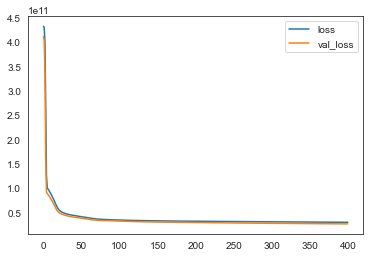

In [50]:
losses.plot()

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### Predicting on Brand New Data

In [52]:
X_test

array([[0.1       , 0.06666667, 0.03510274, ..., 0.00874399, 0.63636364,
        0.        ],
       [0.3       , 0.3       , 0.14297945, ..., 0.00978817, 0.81818182,
        0.        ],
       [0.2       , 0.2       , 0.10359589, ..., 0.0053886 , 0.90909091,
        0.        ],
       ...,
       [0.3       , 0.2       , 0.08732877, ..., 0.00551496, 1.        ,
        0.        ],
       [0.3       , 0.26666667, 0.31678082, ..., 0.11683195, 0.90909091,
        0.        ],
       [0.2       , 0.06666667, 0.08047945, ..., 0.00843269, 0.27272727,
        1.        ]])

In [53]:
predictions = model.predict(X_test)

In [54]:
mean_absolute_error(y_test,predictions)

100868.93566550926

In [55]:
np.sqrt(mean_squared_error(y_test,predictions))

161172.41245016517

In [56]:
explained_variance_score(y_test,predictions)

0.7951708157697199

In [57]:
df['price'].mean()

540296.5735055795

In [58]:
df['price'].median()

450000.0

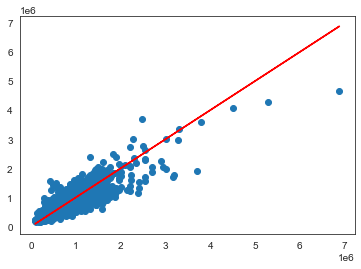

In [59]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [60]:
errors = y_test.values.reshape(5400, 1) - predictions

/Users/parthamehta/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

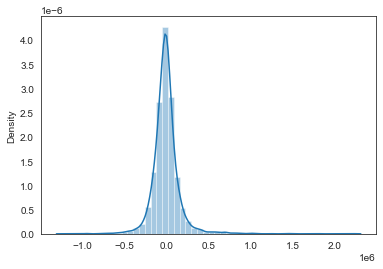

In [61]:
sns.distplot(errors)

-------------
### Predicting on a brand new house

In [62]:
single_house = df.drop('price',axis=1).iloc[0]

In [63]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [64]:
single_house

array([[0.2       , 0.06666667, 0.06934932, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.09878049,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00573322, 0.81818182, 0.        ]])

In [65]:
model.predict(single_house)

array([[282206.34]], dtype=float32)

In [66]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64